In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import VGG16

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import keras
from shutil import copyfile
from zipfile import ZipFile

import matplotlib.pyplot as plt
import scipy.io
from keras.preprocessing import image as kimage

In [31]:
NAMES = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"
]

In [183]:
labels = scipy.io.loadmat('imagelabels.mat')
labels = labels['labels'][0]

split_index = scipy.io.loadmat('setid.mat')
train_id = split_index['trnid'][0]
val_id = split_index['valid'][0]
test_id = split_index['tstid'][0]

In [ ]:
source = "102flowers_train"
dest1 = "102flowers_test"
dest2 = "102flowers_val"

list_files = os.listdir(source)
for i in range(len(list_files)):
    print ('image', i)
    if i not in (train_id-1):
        if i in (test_id-1):
            if not os.path.exists(dest1):
                os.makedirs(dest1)
            shutil.move(source+ '/'+ list_files[i], dest1 + '/' + list_files[i])
        else:
            if not os.path.exists(dest2):
                os.makedirs(dest2)
            shutil.move(source+ '/'+ list_files[i], dest2 + '/' + list_files[i])

In [170]:
def from_image_to_array (source):
    list_image = []
    for file_image in os.listdir(source):
        path_image = source + '/' + file_image
        img = kimage.load_img(path_image, target_size = (224,224))
        image_array = kimage.img_to_array(img)
        list_image.append(image_array)
    data = np.array(list_image)
    return data

In [171]:
X_train = from_image_to_array('102flowers_train')
X_train.shape

In [173]:
X_test= from_image_to_array('102flowers_test')
X_test.shape

(6149, 224, 224, 3)

In [174]:
X_val = from_image_to_array('102flowers_val')
X_val.shape

(1020, 224, 224, 3)

In [ ]:
y_train = labels[train_id-1] # -1 perchè gli indici partono da 1 e non da 0
y_val = labels[val_id-1]
y_test = labels[test_id-1]

In [178]:
import pickle
with open('102flowers_X_val.pickle', 'wb') as handle:
    pickle.dump(X_val, handle)
with open('102flowers_X_train.pickle', 'wb') as handle:
    pickle.dump(X_train, handle)
with open('102flowers_X_test.pickle', 'wb') as handle:
    pickle.dump(X_test, handle)

In [ ]:
with open('102flowers_y_train.pickle', 'wb') as handle:
    pickle.dump(y_train, handle)
with open('102flowers_y_test.pickle', 'wb') as handle:
    pickle.dump(y_test, handle)
with open('102flowers_y_val.pickle', 'wb') as handle:
    pickle.dump(y_val, handle)

# PROVE

In [149]:
train = '102flowers_train'
image = '/image_00888.jpg'
train + image

'102flowers_train/image_00888.jpg'

In [153]:
image = kimage.load_img('102flowers_train/image_00036.jpg', target_size = (224,224))

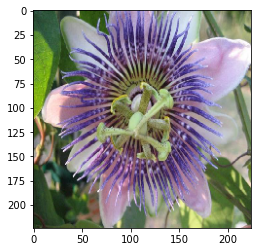

In [154]:
plt.imshow(image)

In [157]:
x = kimage.img_to_array(image)
x.shape

(224, 224, 3)

In [156]:
x.astype('float32')/255.0

array([[[0.17254902, 0.3019608 , 0.23529412],
        [0.18431373, 0.3137255 , 0.24705882],
        [0.15294118, 0.28627452, 0.21960784],
        ...,
        [0.45882353, 0.49019608, 0.32941177],
        [0.40784314, 0.4509804 , 0.28627452],
        [0.3647059 , 0.41568628, 0.24705882]],

       [[0.16078432, 0.28235295, 0.21960784],
        [0.18431373, 0.3137255 , 0.24705882],
        [0.18039216, 0.3137255 , 0.24705882],
        ...,
        [0.47058824, 0.5019608 , 0.34117648],
        [0.42745098, 0.47058824, 0.30588236],
        [0.36078432, 0.4117647 , 0.24313726]],

       [[0.12941177, 0.2509804 , 0.18039216],
        [0.14901961, 0.27058825, 0.2       ],
        [0.21568628, 0.34509805, 0.27058825],
        ...,
        [0.5137255 , 0.54509807, 0.38431373],
        [0.4392157 , 0.48235294, 0.31764707],
        [0.36078432, 0.4117647 , 0.24313726]],

       ...,

       [[0.14117648, 0.22352941, 0.09411765],
        [0.15294118, 0.23529412, 0.11372549],
        [0.14117648, 0

In [ ]:
x = kimage.img_to_array(img)

In [184]:
y_train = labels[train_id-1] # -1 perchè gli indici partono da 1 e non da 0
y_val = labels[val_id-1]
y_test = labels[test_id-1]


In [186]:
with open('102flowers_y_train.pickle', 'wb') as handle:
    pickle.dump(y_train, handle)
with open('102flowers_y_test.pickle', 'wb') as handle:
    pickle.dump(y_test, handle)
with open('102flowers_y_val.pickle', 'wb') as handle:
    pickle.dump(y_val, handle)

In [185]:
y_train.shape

(1020,)